In [2]:
import pandas as pd

df = pd.read_csv(r'C:/Users/HP/OneDrive/Documents/Documents - Copy/Data Analysis Projects/My projects/MySQL Projects/First Project/cleaned_cancer_data.csv')


In [4]:
df.info()       # Data types & nulls


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [6]:
# Convert date columns to datetime format

df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'], errors='coerce')
df['Treatment_Start_Date'] = pd.to_datetime(df['Treatment_Start_Date'], errors='coerce')
df['Death_Date'] = pd.to_datetime(df['Death_Date'], errors='coerce')


In [8]:

df['Survival_Days'] = (df['Death_Date'] - df['Diagnosis_Date']).dt.days
df['Treatment_Delay'] = (df['Treatment_Start_Date'] - df['Diagnosis_Date']).dt.days


In [10]:
# To make sure weight and height are numeric
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

# To create BMI column
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)


In [12]:

df['Is_Deceased'] = df['Outcome'].apply(lambda x: 1 if x == 'Deceased' else 0)


In [14]:

df.describe()   # Summary statistics (numerical columns)


,Age,Diagnosis_Date,Treatment_Start_Date,Death_Date,Weight,Height,Survival_Days,Treatment_Delay,BMI,Is_Deceased
count,10000.000000,10000,10000,992,10000.000000,10000.000000,992.000000,10000.000000,10000.000000,10000.000000
mean,53.539700,2019-08-08 15:31:58.080000,2019-11-05 23:51:38.880000,2020-12-31 22:57:34.838709760,69.550000,169.347500,533.086694,89.347000,24.503744,0.099200
min,18.000000,2015-01-01 00:00:00,2015-01-07 00:00:00,2015-04-24 00:00:00,18.000000,131.000000,32.000000,0.000000,5.673505,0.000000
25%,36.000000,2017-04-05 00:00:00,2017-07-05 00:00:00,2018-09-21 00:00:00,60.000000,163.000000,295.500000,44.000000,20.305175,0.000000
50%,53.000000,2019-08-26 12:00:00,2019-11-24 00:00:00,2020-12-22 00:00:00,70.000000,169.000000,539.000000,90.000000,24.128792,0.000000
75%,72.000000,2021-11-22 00:00:00,2022-02-18 00:00:00,2023-05-24 12:00:00,80.000000,176.000000,763.000000,135.000000,28.384802,0.000000
max,89.000000,2024-03-01 00:00:00,2024-08-23 00:00:00,2026-05-15 00:00:00,122.000000,208.000000,999.000000,179.000000,53.374656,1.000000
std,20.757324,NaN,NaN,NaN,14.933339,10.070118,276.154198,52.299517,6.038208,0.298945


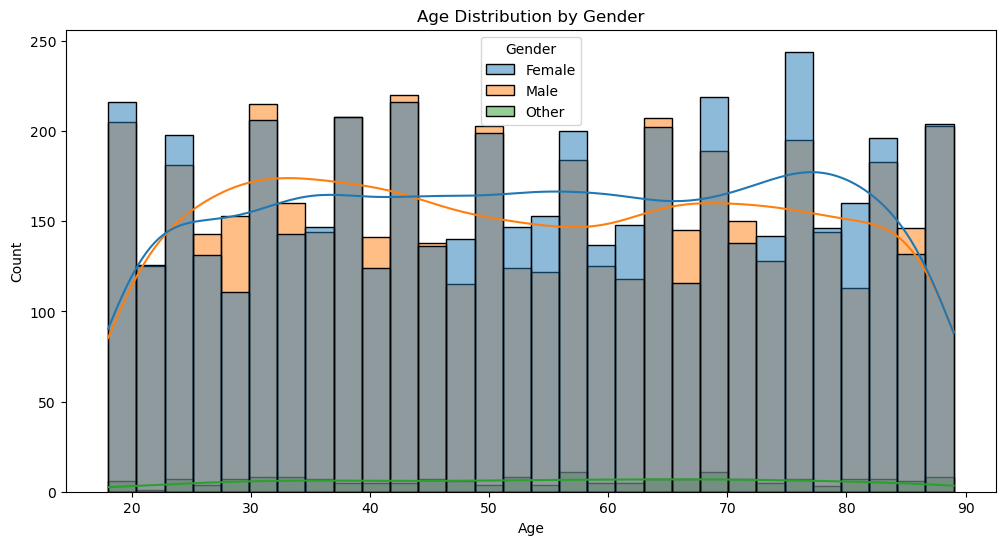

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Age', hue='Gender', kde=True, bins=30)
plt.title('Age Distribution by Gender')
plt.show()


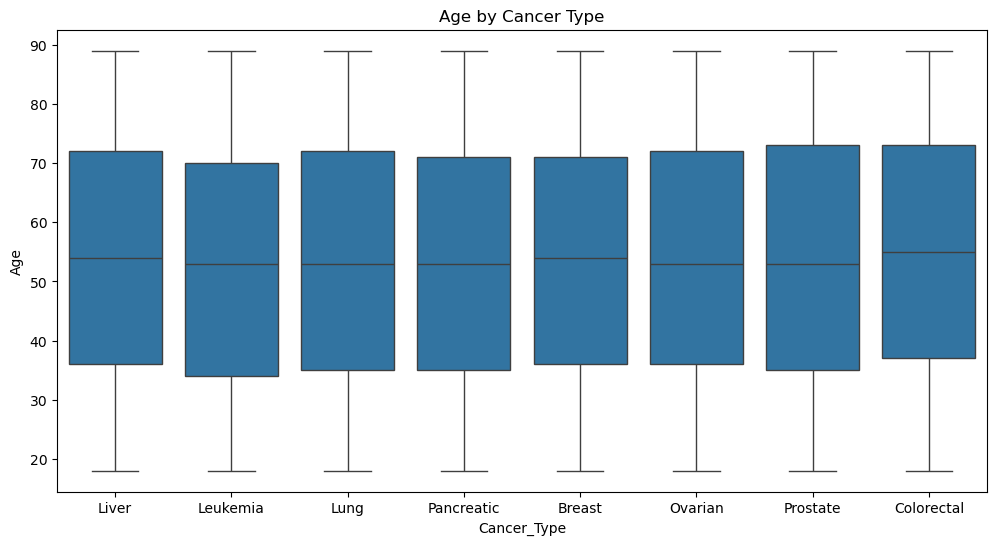

In [20]:

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Cancer_Type', y='Age')
plt.title('Age by Cancer Type')
plt.show()


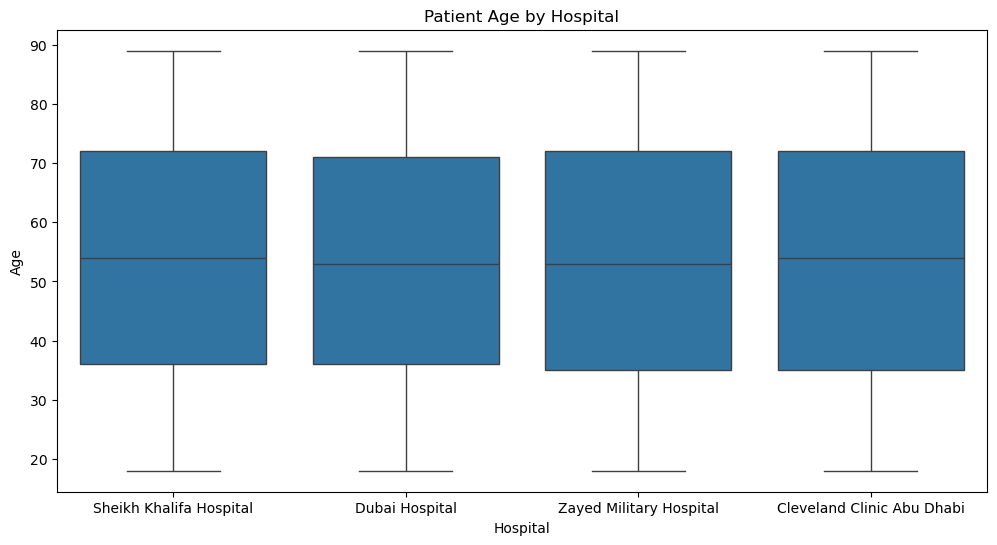

In [22]:

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Hospital', y='Age')
plt.title('Patient Age by Hospital')
plt.show()


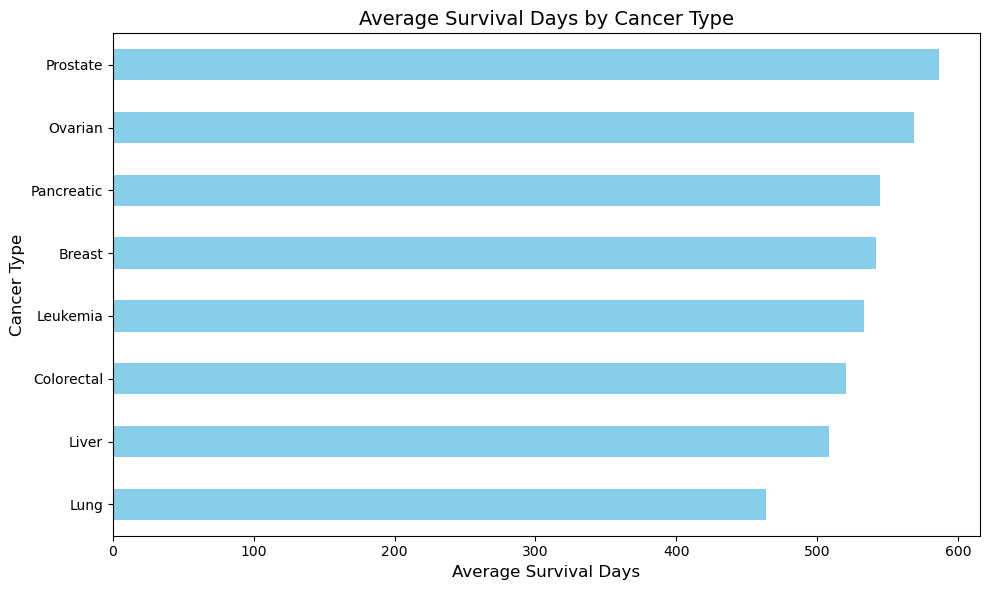

In [24]:
# 1. Do specific cancer types have shorter survival times?
# Bar Plot of Average Survival

# Create the plot
df.groupby('Cancer_Type')['Survival_Days'].mean().sort_values().plot(
    kind='barh',
    figsize=(10, 6),         # Size: width=10, height=6
    color='skyblue'          # Optional: adds color
)

# Add plot title
plt.title('Average Survival Days by Cancer Type', fontsize=14)

# Label axes
plt.xlabel('Average Survival Days', fontsize=12)
plt.ylabel('Cancer Type', fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


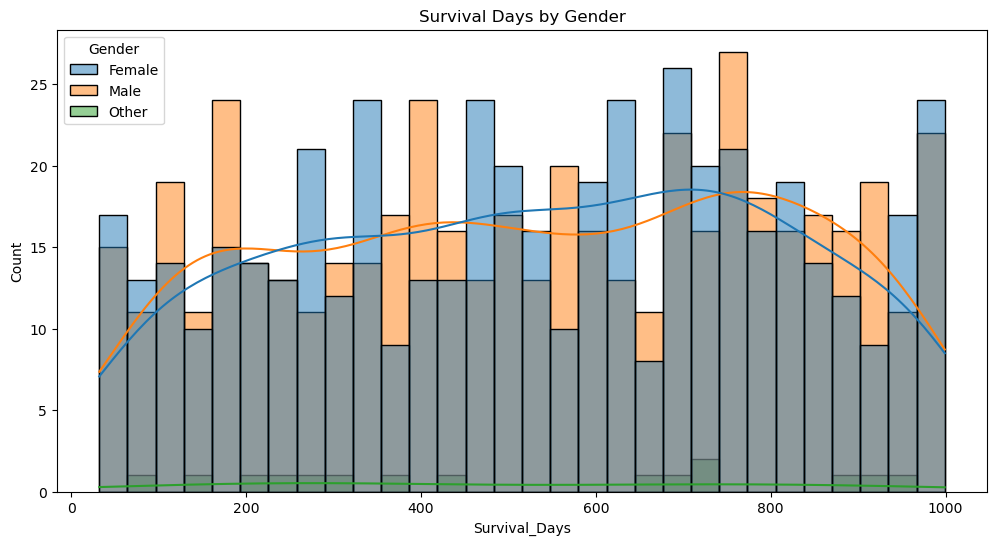

In [26]:
# 2. Compare survival time between genders
# See how survival days are distributed for each gender.

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Survival_Days', hue='Gender', kde=True, bins=30)
plt.title('Survival Days by Gender')
plt.show()


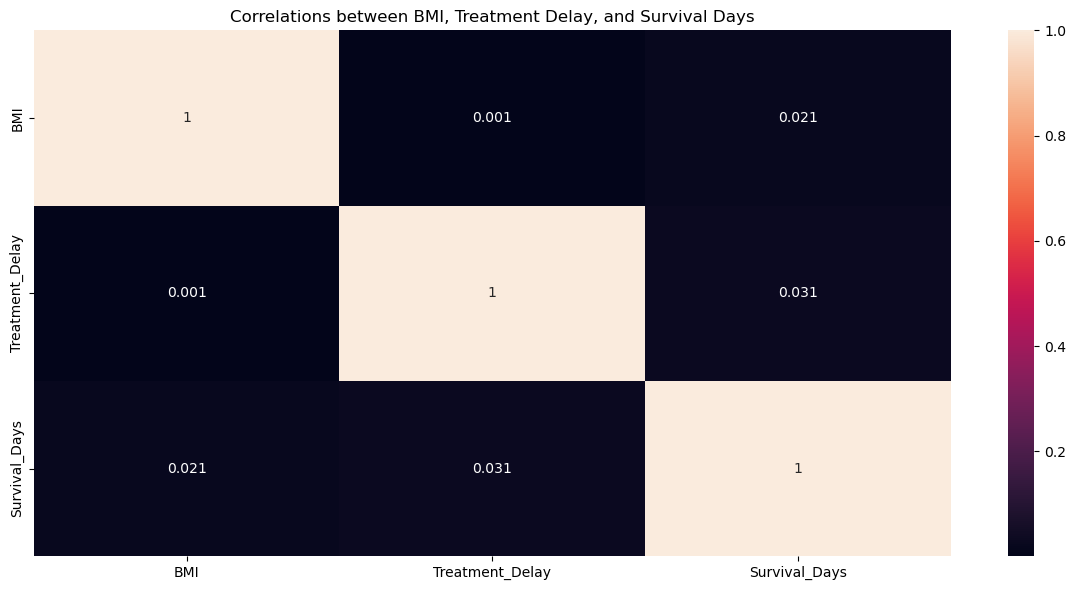

In [28]:
# 3. What are the correlations between BMI, Treatment Delay, and Survival Days?
# Shows strength of relationship between numerical columns.

plt.figure(figsize=(12,6))
sns.heatmap(df[['BMI', 'Treatment_Delay', 'Survival_Days']].corr(), annot=True)
plt.title('Correlations between BMI, Treatment Delay, and Survival Days')
plt.tight_layout()
plt.show()


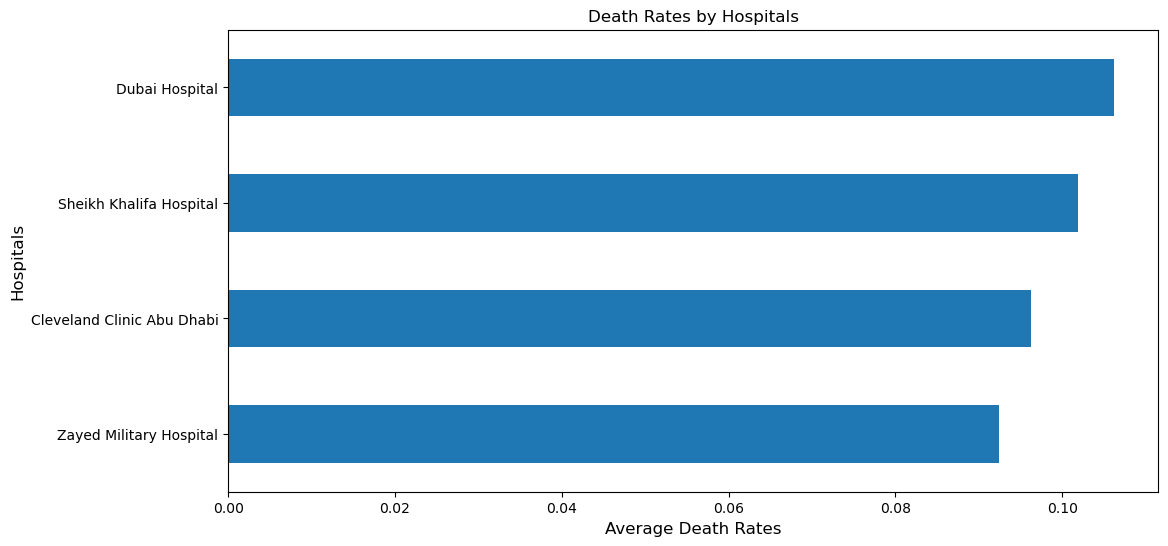

In [30]:
# 4. Hospitals with abnormally high death rates
# Highlights hospitals with higher average death rates.

plt.figure(figsize=(12,6))
death_rates = df.groupby('Hospital')['Is_Deceased'].mean().sort_values()
death_rates.plot(kind='barh')
plt.title('Death Rates by Hospitals')
plt.xlabel('Average Death Rates', fontsize=12)
plt.ylabel('Hospitals', fontsize=12)
plt.show()


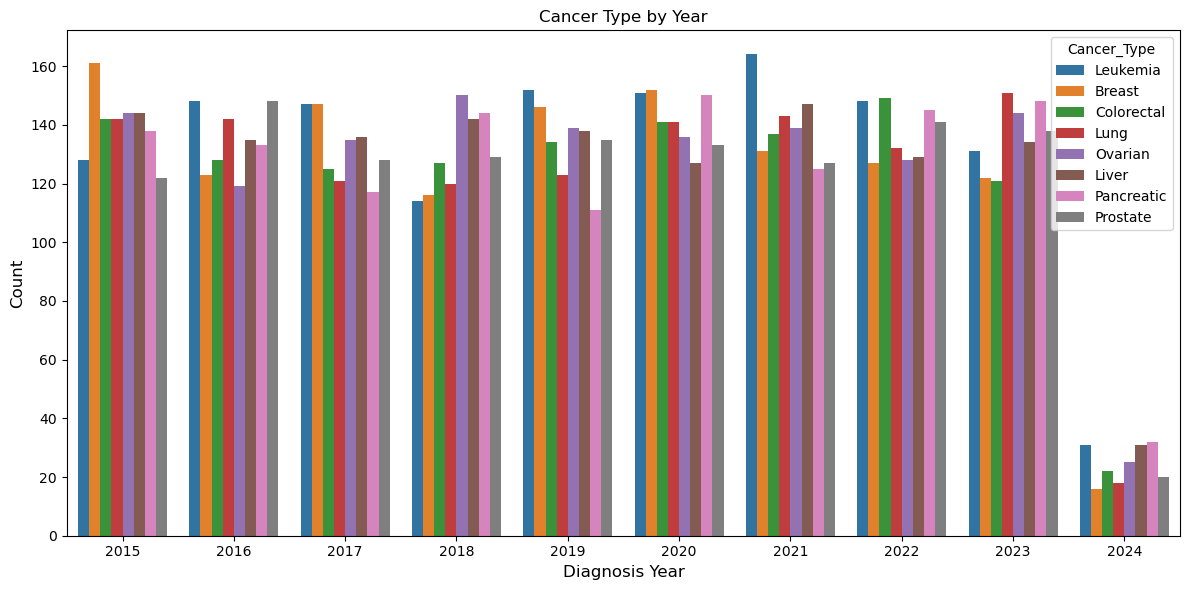

In [34]:
# 5. Which cancer types are more common in recent years?
# Shows increase/decrease in cancer types over years.

plt.figure(figsize=(12,6))
df['Diagnosis_Year'] = pd.to_datetime(df['Diagnosis_Date']).dt.year
sns.countplot(data=df, x='Diagnosis_Year', hue='Cancer_Type')
plt.title('Cancer Type by Year')
plt.xlabel('Diagnosis Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()
